In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers, models
import sklearn
from sklearn import metrics
import tensorflow as tf

In [2]:
import os 
import cv2
import numpy as np

path = os.getcwd()+"\\PetImages\\"
folderNames = os.listdir(path)

xSample, ySample = [], []

for i, folderName in enumerate(folderNames):
    for j, file in enumerate([f for f in os.listdir(os.path.join(path, folderName))
                            if os.path.isfile(os.path.join(path, folderName, f))]):
        img_path = os.path.join(path, folderName, file)
        
        # Check the existence of file
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            
            # Check the size of image
            if img is not None and not img.size == 0:
                img = cv2.resize(img, (150, 150), interpolation=cv2.INTER_LINEAR)/255.
                xSample.append(np.asarray(img))
                ySample.append(i)
            else:
                print(f"Image not valid: {img_path} - Invalid or incorrect image, skipped.")
                #pass
        else:
            print(f"Couldn't find the file: {img_path}")
            #pass

xSample = np.array(xSample)
ySample = np.array(ySample)
print(xSample)
print(ySample)

Image not valid: c:\CatsDogs\PetImages\Cat\10125.jpg - Invalid or incorrect image, skipped.
Image not valid: c:\CatsDogs\PetImages\Cat\10404.jpg - Invalid or incorrect image, skipped.
Image not valid: c:\CatsDogs\PetImages\Cat\10501.jpg - Invalid or incorrect image, skipped.
Image not valid: c:\CatsDogs\PetImages\Cat\10820.jpg - Invalid or incorrect image, skipped.
Image not valid: c:\CatsDogs\PetImages\Cat\11210.jpg - Invalid or incorrect image, skipped.
Image not valid: c:\CatsDogs\PetImages\Cat\11565.jpg - Invalid or incorrect image, skipped.
Image not valid: c:\CatsDogs\PetImages\Cat\11874.jpg - Invalid or incorrect image, skipped.
Image not valid: c:\CatsDogs\PetImages\Cat\11935.jpg - Invalid or incorrect image, skipped.
Image not valid: c:\CatsDogs\PetImages\Cat\140.jpg - Invalid or incorrect image, skipped.
Image not valid: c:\CatsDogs\PetImages\Cat\2663.jpg - Invalid or incorrect image, skipped.
Image not valid: c:\CatsDogs\PetImages\Cat\3300.jpg - Invalid or incorrect image, s

In [3]:
for i, folderName in enumerate(folderNames):
    print(i, folderName)

0 Cat
1 Dog


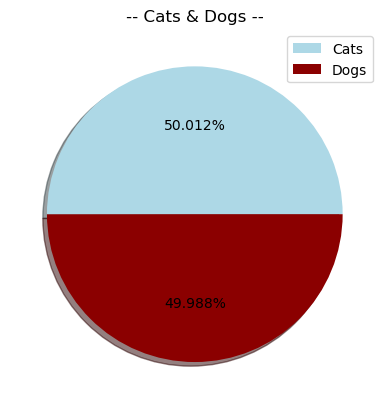

In [4]:
plt.title('-- Cats & Dogs --')

catSizes = len([x for x in ySample if x==0])
dogSizes = len([y for y in ySample if y==1])

labels = ['Cats', 'Dogs']
sizes = catSizes, dogSizes

plt.pie(sizes,
        shadow=True,
        autopct='%1.3f%%',
        colors=['lightblue', 'darkred'])

plt.legend(labels)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xSample, ySample,
                                                test_size=0.17,
                                                random_state=0)

xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain,
                                              test_size=0.20,
                                              random_state=0)

In [7]:
print(xSample.shape)
print(ySample.shape)

(24946, 150, 150, 3)
(24946,)


In [8]:
print(xTrain.shape)
print(xTest.shape)

(16564, 150, 150, 3)
(4241, 150, 150, 3)


In [9]:
print(yTrain.shape)
print(yTest.shape)

(16564,)
(4241,)


In [10]:
print(xVal.shape)
print(yVal.shape)

(4141, 150, 150, 3)
(4141,)


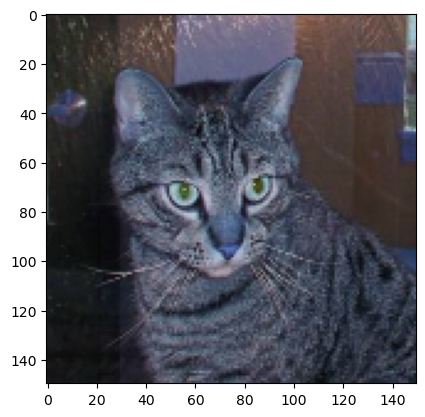

In [11]:
plt.imshow(xSample[1])

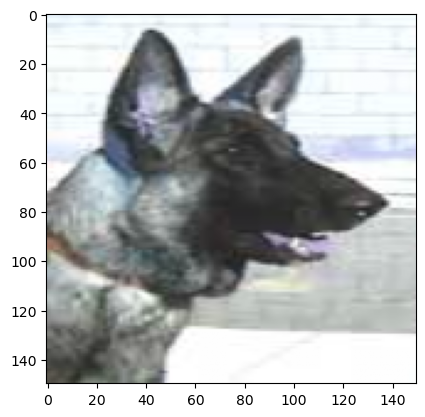

In [12]:
plt.imshow(xSample[-1])

In [6]:
model = models.Sequential()

model.add(layers.Conv2D(50, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(100, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(50, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 50)      1400      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 50)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 50)       200       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 100)       45100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 100)      0         
 2D)                                                             
                                                        

In [7]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    xTrain,
    yTrain,
    epochs=20,
    validation_data=(xVal, yVal)
)

Epoch 1/20
518/518 [==============================] - 365s 699ms/step - loss: 0.6299 - accuracy: 0.6402 - val_loss: 0.6872 - val_accuracy: 0.5557
Epoch 2/20
518/518 [==============================] - 346s 668ms/step - loss: 0.6017 - accuracy: 0.6737 - val_loss: 0.5461 - val_accuracy: 0.7235
Epoch 3/20
518/518 [==============================] - 344s 664ms/step - loss: 0.5336 - accuracy: 0.7341 - val_loss: 0.5346 - val_accuracy: 0.7196
Epoch 4/20
518/518 [==============================] - 344s 664ms/step - loss: 0.4817 - accuracy: 0.7738 - val_loss: 0.4380 - val_accuracy: 0.8141
Epoch 5/20
518/518 [==============================] - 344s 664ms/step - loss: 0.4393 - accuracy: 0.7994 - val_loss: 0.4440 - val_accuracy: 0.7972
Epoch 6/20
518/518 [==============================] - 342s 660ms/step - loss: 0.4005 - accuracy: 0.8202 - val_loss: 0.4322 - val_accuracy: 0.8046
Epoch 7/20
518/518 [==============================] - 344s 664ms/step - loss: 0.3684 - accuracy: 0.8389 - val_loss: 0.4813 -

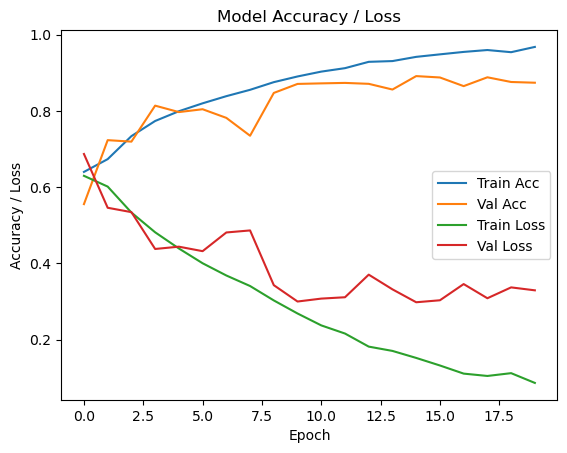

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Accuracy / Loss')
plt.ylabel('Accuracy / Loss')
plt.xlabel('Epoch')

plt.legend(['Train Acc', 'Val Acc', 'Train Loss', 'Val Loss'], loc='center right')
plt.show()